### Image

In [ ]:
!pip install opencv-python # OpenCV 설치하는 코드

In [1]:
import cv2

In [7]:
img = cv2.imread('Handle.png', 0) # 첫번째 매개변수 : 경로를 포함한 이미지
                                  # 두번째 매개변수 : 0,1,-1 -> 이미지를 읽는 방식
                                  # 0 : 흑백/ 1 : 컬러/ -1 : 원본
# print(img)
print(type(img))

<class 'numpy.ndarray'>


In [6]:
import ipywidgets # 파이썬에서 위젯을 활용할 수 있는 라이브러리
ipywidgets.Audio()

Audio(value=b'')

In [9]:
from IPython.display import display # 실제 이미지를 display할 수 있는 라이브러리
img_widgets = ipywidgets.Image(format = 'png')
cv2.imencode('.png',img)  # encoding # 리스트 형태로 출력 0번 인덱스에 결과값이 있으면 true
img_widgets.value = cv2.imencode('.png',img)[1].tostring() # 1번 인덱스에는 실제 데이터가 들어있음 -> 실제 데이터를 문자열 형태로 바꿔줌
display(img_widgets)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x00\x00\x00\x00\x16ED\xe…

In [10]:
img = cv2.imread('Handle.png', 1)
from IPython.display import display
img_widgets = ipywidgets.Image(format = 'png')
cv2.imencode('.png',img)  
img_widgets.value = cv2.imencode('.png',img)[1].tostring() 
display(img_widgets)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…

In [11]:
print(cv2.imencode('.png',img)) # 0번 인덱스에 결과값이 있으면 true, 1번 인덱스에는 실제 데이터가 들어있음

(True, array([[137],
       [ 80],
       [ 78],
       ...,
       [ 66],
       [ 96],
       [130]], dtype=uint8))


### Video

In [24]:
import cv2
import ipywidgets as widgets # 파이썬 위젯 만들기
from IPython.display import display # 실제 이미지를 display할 수 있는 라이브러리
cap = cv2.VideoCapture('pedestrians.mp4') # 동영상 파일 불러와서 비디오 객체 생성(capture)
print(cap.isOpened())

True


In [25]:
img_widget = widgets.Image()
display(img_widget)

Image(value=b'')

In [26]:
import time
if cap.isOpened():  # 실제로 읽어올 값이 있다면
#     print(cap.read())
    ret, img = cap.read() # ret : cap객체를 순차적으로 읽어서 저장, 읽을 게 있다면 True
    while ret:  # ret == True
        img_widget.value = cv2.imencode(".jpeg",img)[1].tostring() # 배열의 형태를 문자열로!
        time.sleep(0.05)
        ret, img = cap.read() # 반복문이 끝나기 전에 프레임을 다시 받아들일건지 결정
cap.release()

### OpenCV 활용해서 이미지에 도형 그리기, 글씨 쓰기
- 선, 원, 직선, 텍스트
- 색깔의 배열 순서가 RGB가 아닌 BGR이다!

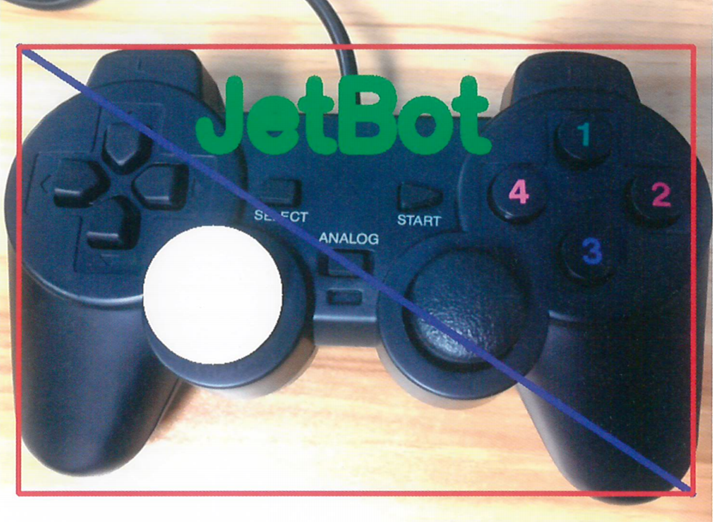

In [42]:
import cv2
img = cv2.imread('Handle.png', 1)

In [46]:
import ipywidgets
from IPython.display import display
img_widgets = ipywidgets.Image(format = 'png')
cv2.imencode('.png',img)  
img_widgets.value = cv2.imencode('.png',img)[1].tostring() 
display(img_widgets)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…

In [35]:
!pip3 install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.9 MB 7.1 kB/s eta 0:00:01     |██████████████▊                 | 17.5 MB 1.7 MB/s eta 0:00:12     |█████████████████▏              | 20.4 MB 696 kB/s eta 0:00:26     |██████████████████████          | 26.0 MB 3.4 MB/s eta 0:00:04     |█████████████████████████▎      | 30.0 MB 2.2 MB/s eta 0:00:04
     |████████████████████████████████| 77 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 540 kB/s eta 0:00:01     |███████████████████████████████▊| 2.9 MB 540 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 15.6 MB/s eta 0:00:01
  Created wheel for matplotlib: filename=matplotlib-3.3.4-cp36-cp36m-linux_aarch64.whl size=9967832 sha256=b351a1891a059e35bf

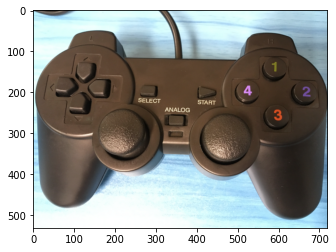

In [44]:
import matplotlib.pyplot as plt
img = cv2.imread('Handle.png', 1)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # convert Color RGB -> BGR
plt.imshow(img)

In [47]:
# x1, y1 : Left-Top / x2, y2 : Right-Bottom
# 1. Draw Line -> line(img, (x1,y1), (x2,y2), (B,G,R),thickness)
cv2.line(img,(100,150),(700,500),(255,0,0),5)
# 2. Rectangle
cv2.rectangle(img,(100,150),(700,500),(0,0,255),3)

array([[[ 78,  92,  97],
        [ 76,  83,  85],
        [ 81,  83,  82],
        ...,
        [180, 220, 238],
        [181, 221, 239],
        [180, 220, 238]],

       [[113, 146, 162],
        [ 92, 119, 132],
        [ 83, 100, 107],
        ...,
        [180, 220, 239],
        [181, 221, 240],
        [181, 221, 240]],

       [[165, 211, 230],
        [148, 189, 207],
        [121, 157, 174],
        ...,
        [181, 221, 240],
        [181, 221, 240],
        [181, 221, 240]],

       ...,

       [[248, 255, 254],
        [248, 255, 254],
        [250, 255, 255],
        ...,
        [151, 205, 238],
        [149, 203, 236],
        [145, 199, 232]],

       [[249, 255, 254],
        [249, 254, 254],
        [249, 254, 254],
        ...,
        [148, 202, 235],
        [150, 203, 236],
        [148, 202, 234]],

       [[247, 255, 254],
        [246, 254, 253],
        [247, 254, 252],
        ...,
        [148, 202, 235],
        [147, 200, 233],
        [147, 201, 233]]

In [48]:
import ipywidgets
from IPython.display import display
img_widgets = ipywidgets.Image(format = 'png')
cv2.imencode('.png',img)  
img_widgets.value = cv2.imencode('.png',img)[1].tostring() 
display(img_widgets)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…

In [52]:
# x1, y1 : Left-Top / x2, y2 : Right-Bottom
# 1. Draw Line -> line(img, (x1,y1), (x2,y2), (B,G,R),thickness)
cv2.line(img,(100,150),(700,500),(255,0,0),5)
# 2. Rectangle
cv2.rectangle(img,(100,150),(700,500),(0,0,255),3)
# 3. Draw Circle -> circle(img,중심점,반지름, (B,G,R), thickness) : 양수면 외곽선, 음수면 원채우기
cv2.circle(img,(200,300),100,(255,255,0),-3)
# 4. Text -> putText(img,"텍스트", 위치, 글씨체, 글씨 크기, (B,G,R), thickness) 
cv2.putText(img,'JETBOT',(200,150),cv2.FONT_HERSHEY_PLAIN,3,(0,255,0),10)

array([[[ 78,  92,  97],
        [ 76,  83,  85],
        [ 81,  83,  82],
        ...,
        [180, 220, 238],
        [181, 221, 239],
        [180, 220, 238]],

       [[113, 146, 162],
        [ 92, 119, 132],
        [ 83, 100, 107],
        ...,
        [180, 220, 239],
        [181, 221, 240],
        [181, 221, 240]],

       [[165, 211, 230],
        [148, 189, 207],
        [121, 157, 174],
        ...,
        [181, 221, 240],
        [181, 221, 240],
        [181, 221, 240]],

       ...,

       [[248, 255, 254],
        [248, 255, 254],
        [250, 255, 255],
        ...,
        [151, 205, 238],
        [149, 203, 236],
        [145, 199, 232]],

       [[249, 255, 254],
        [249, 254, 254],
        [249, 254, 254],
        ...,
        [148, 202, 235],
        [150, 203, 236],
        [148, 202, 234]],

       [[247, 255, 254],
        [246, 254, 253],
        [247, 254, 252],
        ...,
        [148, 202, 235],
        [147, 200, 233],
        [147, 201, 233]]

In [53]:
import ipywidgets
from IPython.display import display
img_widgets = ipywidgets.Image(format = 'png')
cv2.imencode('.png',img)  
img_widgets.value = cv2.imencode('.png',img)[1].tostring() 
display(img_widgets)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x02\x14\x08\x02\x00\x00\x00\xbcL\x8c…